In [7]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

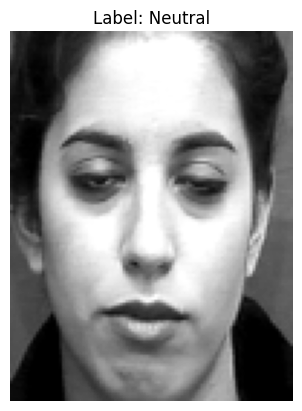

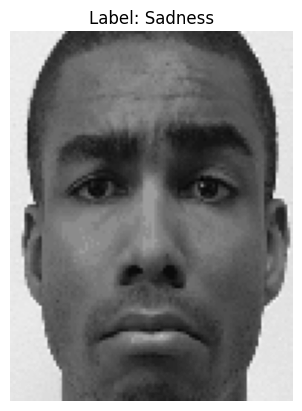

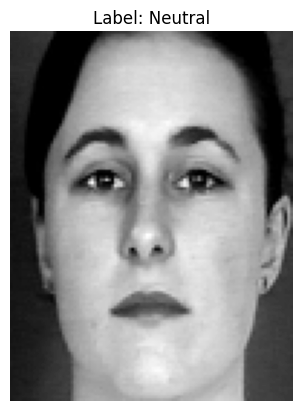

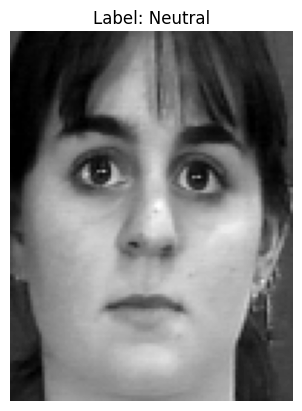

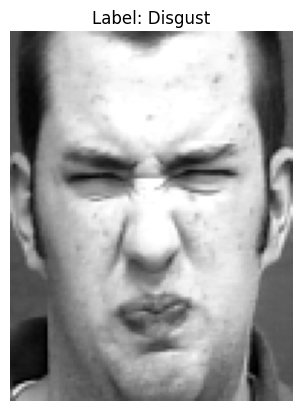

Images shape: (1406, 128, 98)
Labels: ['Fear' 'Fear' 'Fear' ... 'Happy' 'Happy' 'Happy']
Images: [[[200 201 199 ... 203 193 203]
  [203 201 207 ... 198 198 195]
  [199 205 203 ... 196 199 197]
  ...
  [188 185 185 ... 181 185 183]
  [188 185 184 ... 186 183 186]
  [188 185 185 ... 185 184 183]]

 [[103 102 102 ... 114 111 117]
  [103 102 102 ... 112 115 119]
  [101 101 101 ... 112 106 114]
  ...
  [ 67  65  65 ... 254 255 217]
  [ 64  64  64 ... 178 206 227]
  [ 62  62  61 ... 205 229 222]]

 [[205 202 205 ... 199 198 197]
  [203 203 200 ... 198 197 197]
  [201 203 206 ... 198 200 197]
  ...
  [187 182 183 ... 186 186 187]
  [187 185 183 ... 185 185 186]
  [184 184 180 ... 189 184 185]]

 ...

 [[ 43  43  43 ...  48  45  45]
  [ 42  42  43 ...  48  46  45]
  [ 42  42  41 ...  46  45  47]
  ...
  [ 26  31  28 ...  36  36  37]
  [ 27  29  27 ...  38  38  39]
  [ 28  27  28 ...  38  39  39]]

 [[ 19  20  23 ...  40  39  36]
  [ 20  22  23 ...  42  39  38]
  [ 22  24  23 ...  40  38  37]
 

In [11]:
def read_images_from_folders(root_folder):
    images = []
    labels = []

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)

        if os.path.isdir(folder_path):
            label = folder_name

            for filename in os.listdir(folder_path):
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    img = cv2.imread(os.path.join(folder_path, filename))
                    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    resized_img = cv2.resize(gray_img, (98, 128))
                    images.append(resized_img)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

def plot_random_image_with_label(images, labels):
    index = random.randint(0, len(images) - 1)
    image = images[index]
    label = labels[index]

    plt.imshow(image, cmap='gray')
    plt.title("Label: " + label)
    plt.axis('off')
    plt.show()

data_dir = "./dataset/"
images, labels = read_images_from_folders(data_dir)
for i in range(5):
    plot_random_image_with_label(images, labels)

print("Images shape:", images.shape)
print("Labels:", labels)



def load_and_process_data(data_dir):
    images_path = []
    labels = []

    text_labels = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', 'Surprise']
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(text_labels)
    label_dict = dict(zip(text_labels, encoded_labels))

    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            images_path.append(image_path)
            labels.append(label_dict[label])

    images_path = np.array(images_path)
    labels = np.array(labels)

    return images_path, labels

images_path, labels = load_and_process_data(data_dir)

print("Images:", images)
print("Encoded Labels:", labels)


In [12]:
images.shape

(1406, 128, 98)

In [13]:
labels.shape

(1406,)

Epoch 1/400
1/1 [==============================] - 4s 4s/step - loss: 170.4117 - accuracy: 0.0521 - val_loss: 62.4479 - val_accuracy: 0.3617
Epoch 2/400
1/1 [==============================] - 0s 60ms/step - loss: 88.2163 - accuracy: 0.2348 - val_loss: 122.6440 - val_accuracy: 0.1574
Epoch 3/400
1/1 [==============================] - 0s 55ms/step - loss: 133.7732 - accuracy: 0.1554 - val_loss: 81.9270 - val_accuracy: 0.3617
Epoch 4/400
1/1 [==============================] - 0s 60ms/step - loss: 100.9062 - accuracy: 0.2835 - val_loss: 72.2129 - val_accuracy: 0.3574
Epoch 5/400
1/1 [==============================] - 0s 61ms/step - loss: 98.9663 - accuracy: 0.2451 - val_loss: 45.6654 - val_accuracy: 0.2383
Epoch 6/400
1/1 [==============================] - 0s 58ms/step - loss: 92.6122 - accuracy: 0.1973 - val_loss: 31.9544 - val_accuracy: 0.4170
Epoch 7/400
1/1 [==============================] - 0s 73ms/step - loss: 75.6339 - accuracy: 0.2195 - val_loss: 32.9352 - val_accuracy: 0.3660
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


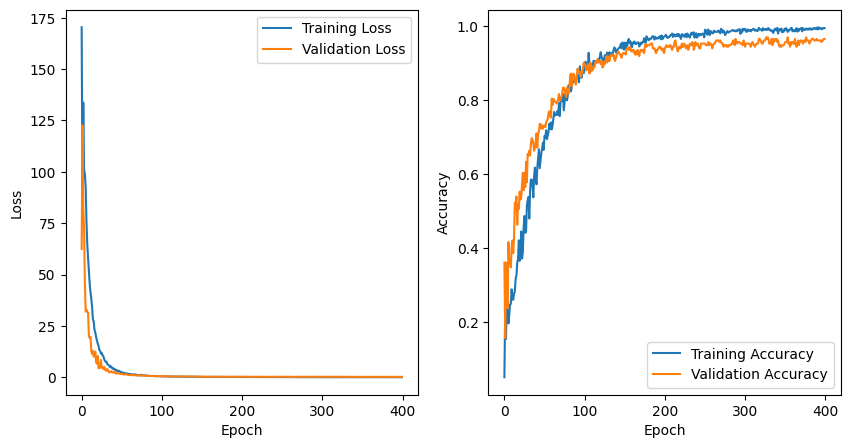

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split

# Convert data to numpy arrays
train_features_np = np.array(images)
train_labels_np = np.array(labels)

# Divide dataset into training and validation sets
train_features, val_features, train_labels, val_labels = train_test_split(train_features_np, train_labels_np, test_size=1/6)

# Define MLP model
model = models.Sequential([
    layers.Flatten(input_shape=(128, 98)),  # Flatten the input images
    layers.Dense(500, activation='relu'),  # 1st hidden layer with ReLU activation
    layers.Dense(500, activation='relu'),  # 2nd hidden layer with ReLU activation
    layers.Dense(500, activation='relu'),  # 3rd hidden layer with ReLU activation
    layers.Dense(500, activation='relu'),  # 4rd hidden layer with ReLU activation
    layers.Dropout(0.3),
    layers.Dense(8)  # Output layer with 8 units (for 8 classes)
    ])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
history = model.fit(train_features, train_labels, epochs=400, batch_size=len(train_features), validation_data=(val_features, val_labels))
model.summary()

# Save model
model.save('model_q5.h5')

# Plot loss and accuracy figures
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


for test this MLP network convert your inputs into input_shape=(128, 98) and Convert data to NumPy arrays
test_features_np = np.array(val_features)
test_labels_np = np.array(val_labels)
and then run this cell

Test Loss: 0.2028
Test Accuracy: 0.9660


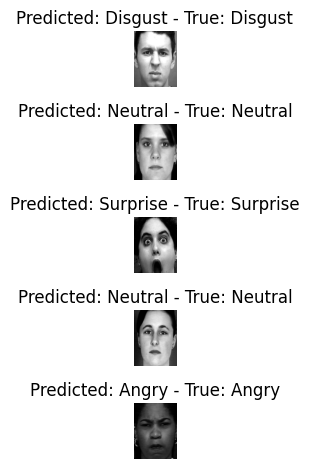

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Convert data to NumPy arrays
test_features_np = np.array(val_features)
test_labels_np = np.array(val_labels)


# Load the model
model = Sequential([
    Flatten(input_shape=(128, 98)),  # Flatten the input images
    Dense(500, activation='relu'),  # 1st hidden layer with ReLU activation
    Dense(500, activation='relu'),  # 2nd hidden layer with ReLU activation
    Dense(500, activation='relu'),  # 3rd hidden layer with ReLU activation
    Dense(500, activation='relu'),  # 4rd hidden layer with ReLU activation
    Dropout(0.3),
    Dense(8)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.load_weights('model_q5.h5')

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_features_np, test_labels_np, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Define a dictionary to map label indices to corresponding words
label_word_map = {
    0: 'Angry',
    1: 'Contempt',
    2: 'Disgust',
    3: 'Fear',
    4: 'Happy',
    5: 'Neutral',
    6: 'Sadness',
    7: 'Surprise'
}


# Randomly select 5 samples
num_samples = 5
random_indices = np.random.choice(len(test_features_np), num_samples, replace=False)
test_features_samples = test_features_np[random_indices]
test_labels_samples = test_labels_np[random_indices]

test_outputs = model(test_features_samples)

for i in range(num_samples):
    plt.subplot(num_samples, 1, i + 1)
    plt.imshow(test_features_samples[i].reshape(128, 98), cmap='gray')  # Reshape the image to its original dimensions
    predicted_label = label_word_map[np.argmax(test_outputs[i])]
    true_label = label_word_map[test_labels_samples[i]]
    plt.title(f'Predicted: {predicted_label} - True: {true_label}')
    plt.axis('off')
    plt.tight_layout()

plt.show()



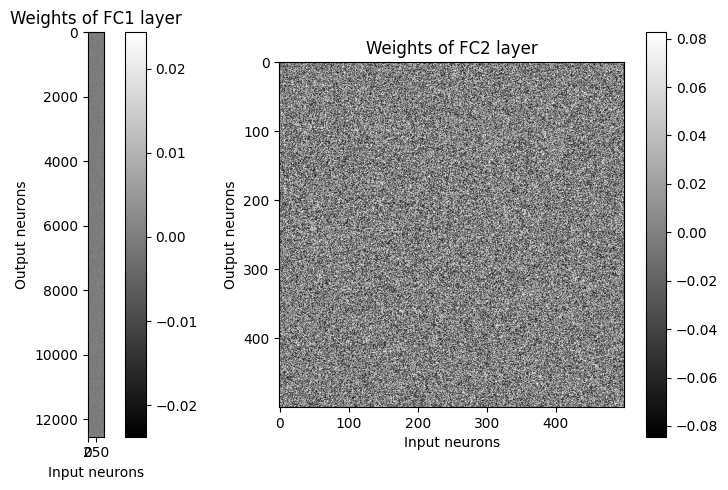

In [25]:
def plot_weights(model):
    weights = model.get_weights()  # Get the weights of all layers

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Weights of FC1 layer')
    weights_fc1 = weights[0]  # Get weights of FC1 layer
    plt.imshow(weights_fc1, cmap='gray')
    plt.colorbar()
    plt.xlabel('Input neurons')
    plt.ylabel('Output neurons')

    plt.subplot(1, 2, 2)
    plt.title('Weights of FC2 layer')
    weights_fc2 = weights[2]  # Get weights of FC2 layer
    plt.imshow(weights_fc2, cmap='gray')
    plt.colorbar()
    plt.xlabel('Input neurons')
    plt.ylabel('Output neurons')

    plt.tight_layout()
    plt.show()


plot_weights(model)


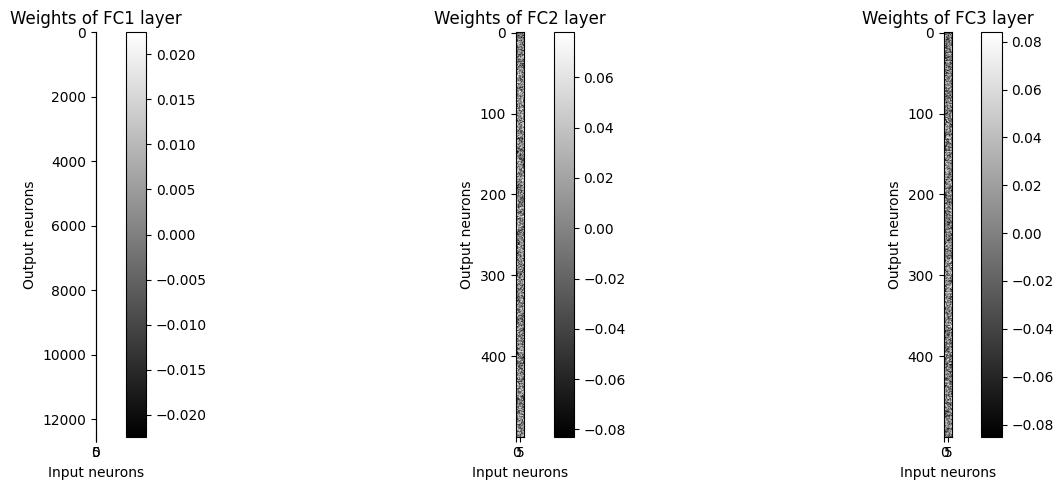

In [26]:
def plot_weights(model):
    weights = model.get_weights()  # Get the weights of all layers

    plt.figure(figsize=(15, 5))

    # Plot weights of FC1 layer
    plt.subplot(1, 3, 1)
    plt.title('Weights of FC1 layer')
    weights_fc1 = weights[0]  # Get weights of FC1 layer
    plt.imshow(weights_fc1[:, :10], cmap='gray')  # Display first 10 weights
    plt.colorbar()
    plt.xlabel('Input neurons')
    plt.ylabel('Output neurons')

    # Plot weights of FC2 layer
    plt.subplot(1, 3, 2)
    plt.title('Weights of FC2 layer')
    weights_fc2 = weights[2]  # Get weights of FC2 layer
    plt.imshow(weights_fc2[:, :10], cmap='gray')  # Display first 10 weights
    plt.colorbar()
    plt.xlabel('Input neurons')
    plt.ylabel('Output neurons')

    # Plot weights of FC3 layer
    plt.subplot(1, 3, 3)
    plt.title('Weights of FC3 layer')
    weights_fc3 = weights[4]  # Get weights of FC3 layer
    plt.imshow(weights_fc3[:, :10], cmap='gray')  # Display first 10 weights
    plt.colorbar()
    plt.xlabel('Input neurons')
    plt.ylabel('Output neurons')

    plt.tight_layout()
    plt.show()


plot_weights(model)


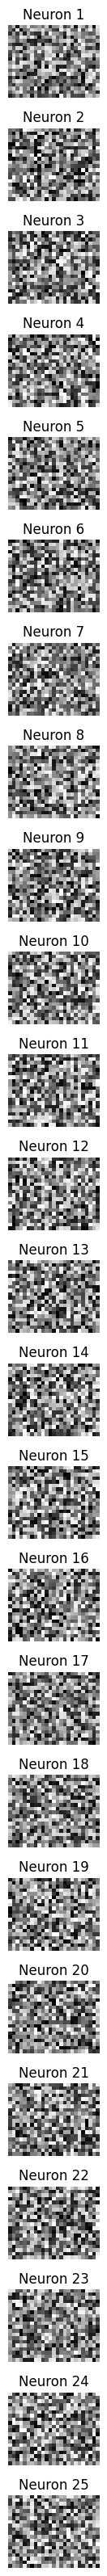

In [23]:
# Get weights of the third hidden layer
third_layer_weights = model.layers[3].get_weights()[0]

# Plot weights leading to 10 neurons
neurons = 25
fig, axes = plt.subplots(neurons, figsize=(16, 32))

for i in range(neurons):
    axes[i].imshow(third_layer_weights[:, i].reshape(20, 25), cmap='gray')
    axes[i].set_title(f'Neuron {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


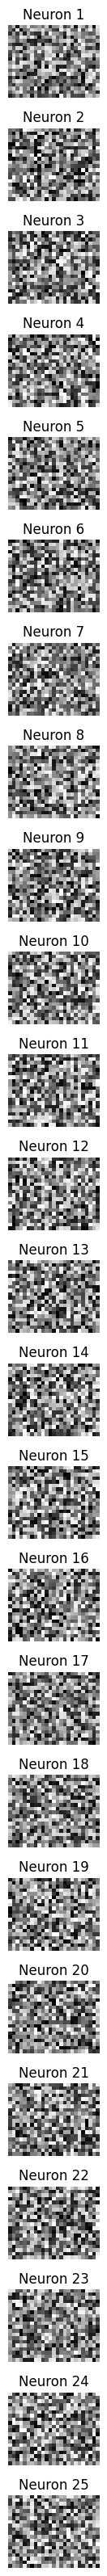

In [31]:
# Get weights of the first hidden layer
first_layer_weights = model.layers[1].get_weights()[0]

# Plot weights leading to 10 neurons
neurons = 25
fig, axes = plt.subplots(neurons, figsize=(16, 32))

for i in range(neurons):
    axes[i].imshow(third_layer_weights[:, i].reshape(20, 25), cmap='gray')
    axes[i].set_title(f'Neuron {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()
